## Reading shapefiles

Earlier in class we used QGIS to access geospatial vector files called "shapefiles".  The mpl_toolkits also let's us do this.  I haven't yet figured out how to do this remotely, so we'll have to read data off local disk.

I was able to get Atlantic hurricane tracks, so we'll use that and try to display.

In [21]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
%matplotlib inline

In [22]:
# The example is for the Atlantic, so we setup a Lambert map:
m = Basemap(llcrnrlon=-100.,llcrnrlat=0.,urcrnrlon=-20.,urcrnrlat=57.,
            projection='lcc',lat_1=20.,lat_2=40.,lon_0=-60.,
            resolution ='l',area_thresh=1000.)

In [23]:
# Step two is to read the shapefile; here we need to read from local disk.
# I believe the syntax is the relative path to the data file(s) without
# the suffix, so here I have hurmjrl1020.dfb, .shp, and so on.  The second
# name is our reference to our basemap object.
shp_info = m.readshapefile('./hurricanes/hurmjrl020','hurricanes',drawbounds=False)

RuntimeError: Can not put single artist in more than one figure

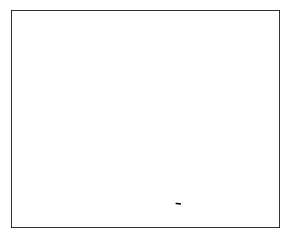

In [26]:
# Now the data are loaded, we can search for all named storms of category 4 or 5.
# These fields are in the shapefile attribute file (i.e., "CATEGORY" and "NAME")
names = []
for shapedict in m.hurricanes_info:
    cat = shapedict['CATEGORY']
    name = shapedict['NAME']
    if cat in ['H4','H5'] and name not in names:
        # only use named storms.
        if name != 'NOT NAMED':  names.append(name)

# plot tracks of those storms.
for shapedict,shape in zip(m.hurricanes_info,m.hurricanes):
    name = shapedict['NAME']
    cat = shapedict['CATEGORY']
    if name in names:
        xx,yy = zip(*shape)
        # show part of track where storm > Cat 4 as thick red.
        if cat in ['H4','H5']: 
            m.plot(xx,yy,linewidth=1.5,color='r')
        elif cat in ['H1','H2','H3']:
            m.plot(xx,yy,color='k')

# draw coastlines, meridians and parallels.
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='#99ffff')
m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.drawparallels(np.arange(10,70,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(-100,0,20),labels=[0,0,0,1])
plt.title('Atlantic Hurricane Tracks (Storms Reaching Category 4)')